In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#loading the data 
nifty=pd.read_csv('nifty.csv',index_col='Date',parse_dates=True)
#showing the data
nifty

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0
...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0


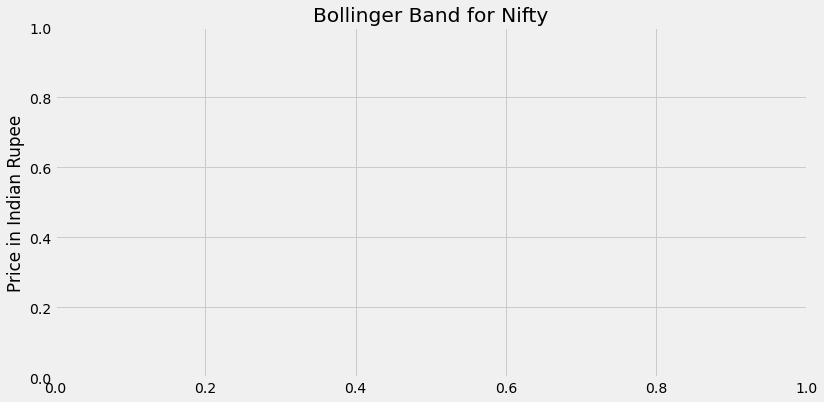

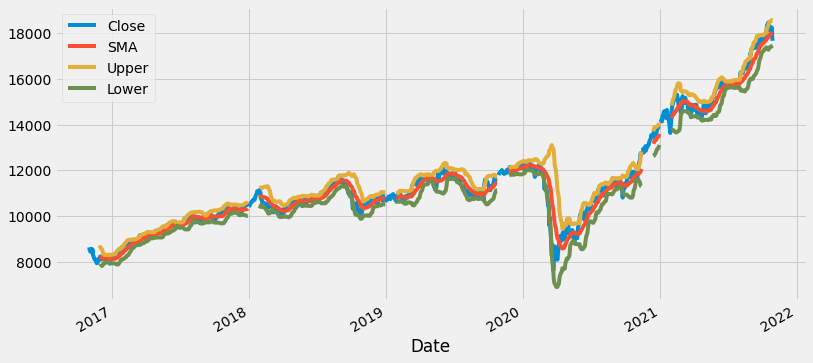

In [12]:
#Calculting the simple moving avaverage,standard deviation, upper band and the lower band
period=20
#Calculate the moving average
nifty['SMA']=nifty['Close'].rolling(window=period).mean()
#Calculating the standard deviation
nifty['STD']=nifty['Close'].rolling(window=period).std()
#Calculate the upper bollinger band
nifty['Upper']=nifty['SMA']+(nifty['STD']*2)
nifty['Lower']=nifty['SMA']-(nifty['STD']*2)
column_list=['Close','SMA','Upper','Lower']
plt.figure(figsize=(12,6))
plt.title('Bollinger Band for Nifty')
plt.ylabel('Price in Indian Rupee')
nifty[column_list].plot(figsize=(12,6))
plt.show()

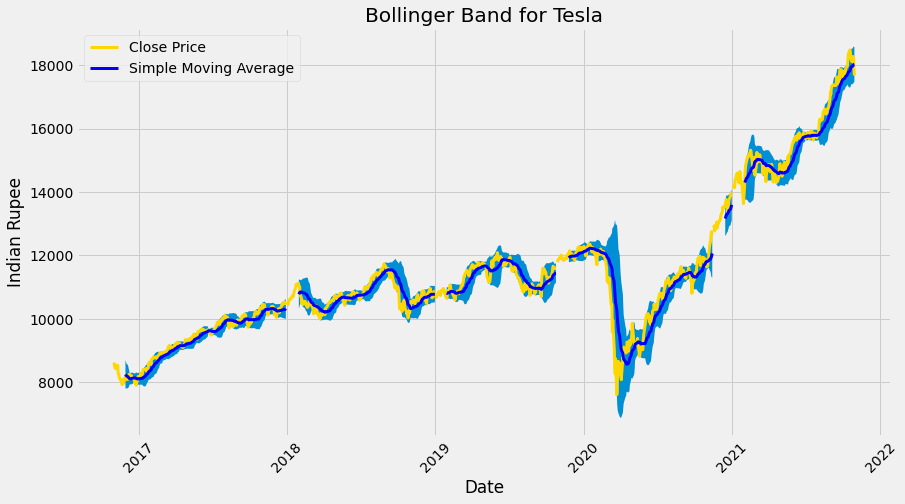

In [15]:
#plot and shade the area between the two Bollinger bands
#get the figure an the figure size
fig=plt.figure(figsize=(13,7))
#Add the subplot
ax=fig.add_subplot(1,1,1)
#Get the index values of the data frame
x_axis=nifty.index
#Plot and shade the area between the upper and the lower band grey
ax.fill_between(x_axis,nifty['Upper'],nifty['Lower'])
#plot the closing price and the moving average
ax.plot(x_axis,nifty['Close'],color='gold',lw=3,label='Close Price')
ax.plot(x_axis,nifty['SMA'],color='blue',lw=3,label='Simple Moving Average')
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Indian Rupee')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [38]:
#create a function to get the buy and sell signal
def get_signal(data):
    buy_signal=[]
    sell_signal=[]
    for i in range(len(data['Close'])):
        if data['Close'][i]>data['Upper'][i]:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['Close'][i]<data['Lower'][i]:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal,sell_signal)
    
    
    
    
    
    
    

In [39]:
#Creating two new column 
nifty['Buy']=get_signal(nifty)[0]
nifty['Sell']=get_signal(nifty)[1]
nifty

,Open,High,Low,Close,Adj Close,Volume,sma,STD,SMA,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0,17966.465039,280.545755,17966.465039,18527.556549,17405.373529,NaN,NaN
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0,17987.130078,287.057148,17987.130078,18561.244373,17413.015783,NaN,NaN
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0,18010.247558,285.449247,18010.247558,18581.146053,17439.349064,NaN,NaN


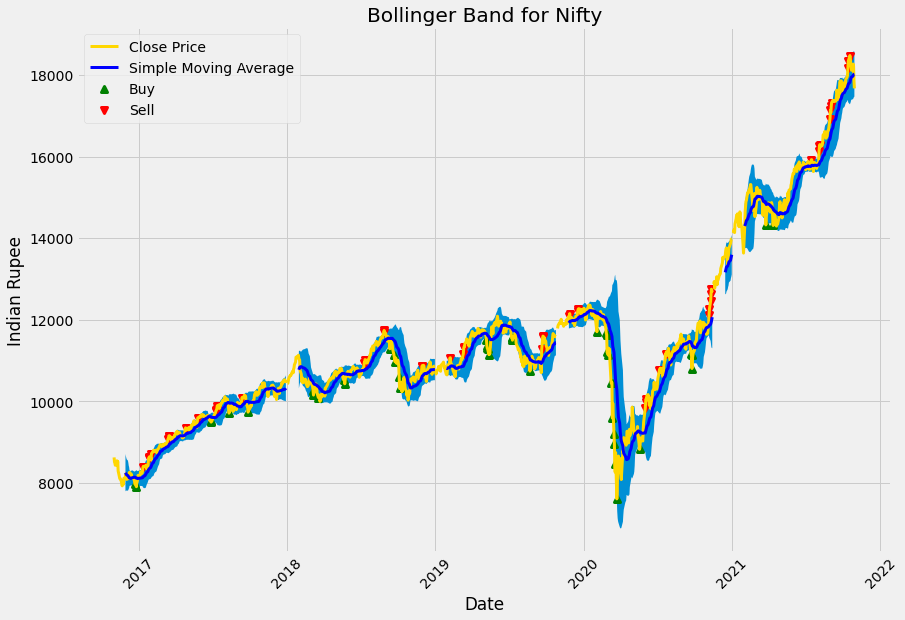

In [40]:
fig=plt.figure(figsize=(13,9))
#Add the subplot
ax=fig.add_subplot(1,1,1)
#Get the index values of the data frame
x_axis=nifty.index
#Plot and shade the area between the upper and the lower band grey
ax.fill_between(x_axis,nifty['Upper'],nifty['Lower'])
#plot the closing price and the moving average
ax.plot(x_axis,nifty['Close'],color='gold',lw=3,label='Close Price')
ax.plot(x_axis,nifty['SMA'],color='blue',lw=3,label='Simple Moving Average')
ax.scatter(x_axis,nifty['Buy'],color='green',lw=3,label='Buy',marker='^')

ax.scatter(x_axis,nifty['Sell'],color='red',lw=3,label='Sell',marker='v')
ax.set_title('Bollinger Band for Nifty')
ax.set_xlabel('Date')
ax.set_ylabel('Indian Rupee')
plt.xticks(rotation=45)
ax.legend()
plt.show()